<a href="https://colab.research.google.com/github/younghw4n/deeplearning/blob/master/COVID_19_Project_2015270047_%EC%A1%B0%EC%98%81%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**COVID-19 dataset을 이용한 Keras 분류**

##요약

최근 발생한 코로나 바이러스(COVID-19) 여파로 인해 전 세계가 공포에 떨고 있다. 이에 대한민국 질병관리본부에서는 Keggle에 한국 코로나 바이러스 감염자의 dataset을 업로드 하였고, 여기에 한양대 대학원생인 김지후 연구원(datartist)은 실시간으로 업데이트를 하고 있다. 따라서 중간 프로젝트는 교재 '케라스 창시자에게 배우는 딥러닝'에서 배운 방식으로 dataset을 전처리하고, 세가지 분류 방식인 이진분류, 다중분류, 회귀문제를 해결하는 방식으로 dataset을 분류해보기로 하였다. 더 나아가 COVID-19 전염률을 상승시키는 원인을 찾아볼 수 있는 방식으로 기말 프로젝트를 준비해 보려고 한다.

##dataset 

https://www.kaggle.com/kimjihoo/coronavirusdataset

In [0]:
from google.colab import files
uploaded = files.upload()

Saving dataset.PNG to dataset.PNG


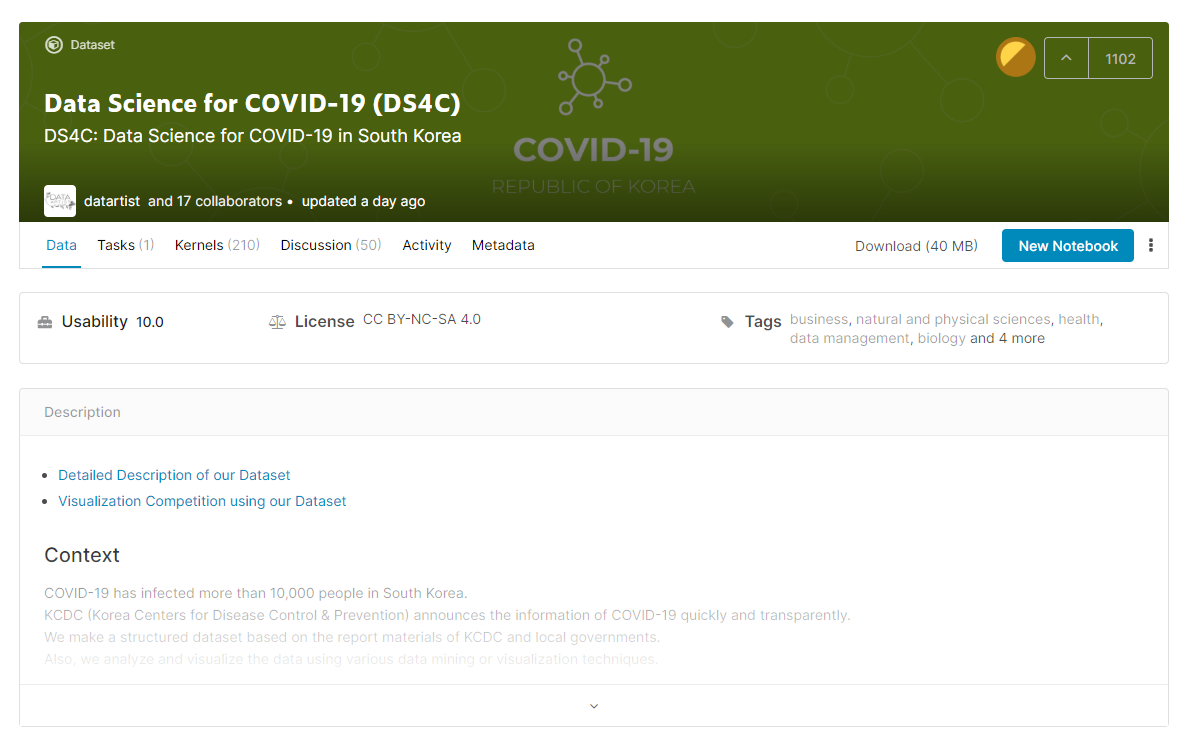

In [0]:
from IPython.display import Image
Image('dataset.PNG')

###import

In [0]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###google drive mount

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/coronavirusdataset

/content/drive/My Drive/coronavirusdataset


In [0]:
!ls

Case.csv	  Policy.csv	     TimeAge.csv       Weather.csv
dataset.PNG	  Region.csv	     Time.csv
PatientInfo.csv   SearchTrend.csv    TimeGender.csv
PatientRoute.csv  SeoulFloating.csv  TimeProvince.csv


###data checking

In [0]:
patient = pd.read_csv('PatientInfo.csv')
patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [0]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519 entries, 0 to 3518
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3519 non-null   int64  
 1   global_num          2388 non-null   float64
 2   sex                 3361 non-null   object 
 3   birth_year          2975 non-null   float64
 4   age                 3353 non-null   object 
 5   country             3519 non-null   object 
 6   province            3519 non-null   object 
 7   city                3440 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2749 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         836 non-null    float64
 12  contact_number      648 non-null    float64
 13  symptom_onset_date  495 non-null    object 
 14  confirmed_date      3516 non-null   object 
 15  released_date       1357 non-null   object 
 16  deceas

###data prepatation

*sex*

In [0]:
pd.crosstab(patient['patient_id'], patient['sex'])

sex,female,male
patient_id,,
1000000001,0,1
1000000002,0,1
1000000003,0,1
1000000004,0,1
1000000005,1,0
...,...,...
7000000010,1,0
7000000011,0,1
7000000012,1,0


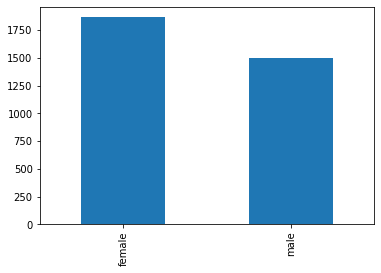

In [0]:
patient['sex'].value_counts().plot.bar()

*birth year*

In [0]:
patient['birth_year'].value_counts()

1995.0    89
1996.0    87
1998.0    86
1994.0    84
1999.0    80
          ..
1923.0     2
2016.0     2
1925.0     2
1916.0     1
1922.0     1
Name: birth_year, Length: 99, dtype: int64

*country*

In [0]:
patient['country'].value_counts()

Korea            3490
China              11
United States       6
Thailand            2
Switzerland         1
Spain               1
Germany             1
Mongolia            1
Bangladesh          1
Canada              1
France              1
Foreign             1
Indonesia           1
Vietnam             1
Name: country, dtype: int64

*confirmed date*

In [0]:
pd.crosstab(patient['patient_id'], patient['confirmed_date'])

confirmed_date,2020-01-20,2020-01-23,2020-01-26,2020-01-27,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-05,2020-02-06,2020-02-07,2020-02-09,2020-02-10,2020-02-16,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,...,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000000001,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000000002,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000000003,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000000004,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000000005,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000000010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7000000011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7000000012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
patient['confirmed_date'] = pd.to_datetime(patient['confirmed_date'])
patient.dtypes

patient_id                     int64
global_num                   float64
sex                           object
birth_year                   float64
age                           object
country                       object
province                      object
city                          object
disease                       object
infection_case                object
infection_order              float64
infected_by                  float64
contact_number               float64
symptom_onset_date            object
confirmed_date        datetime64[ns]
released_date         datetime64[ns]
deceased_date         datetime64[ns]
state                         object
dtype: object

##confirmed date

In [0]:
confirmed = pd.pivot_table(data=patient, 
                          index='confirmed_date',
                          values='patient_id',
                          aggfunc='count')
confirmed

,patient_id
confirmed_date,
2020-01-20,1
2020-01-23,1
2020-01-26,1
2020-01-27,1
2020-01-30,3
...,...
2020-05-10,24
2020-05-11,21
2020-05-12,13


Text(0, 0.5, 'number')

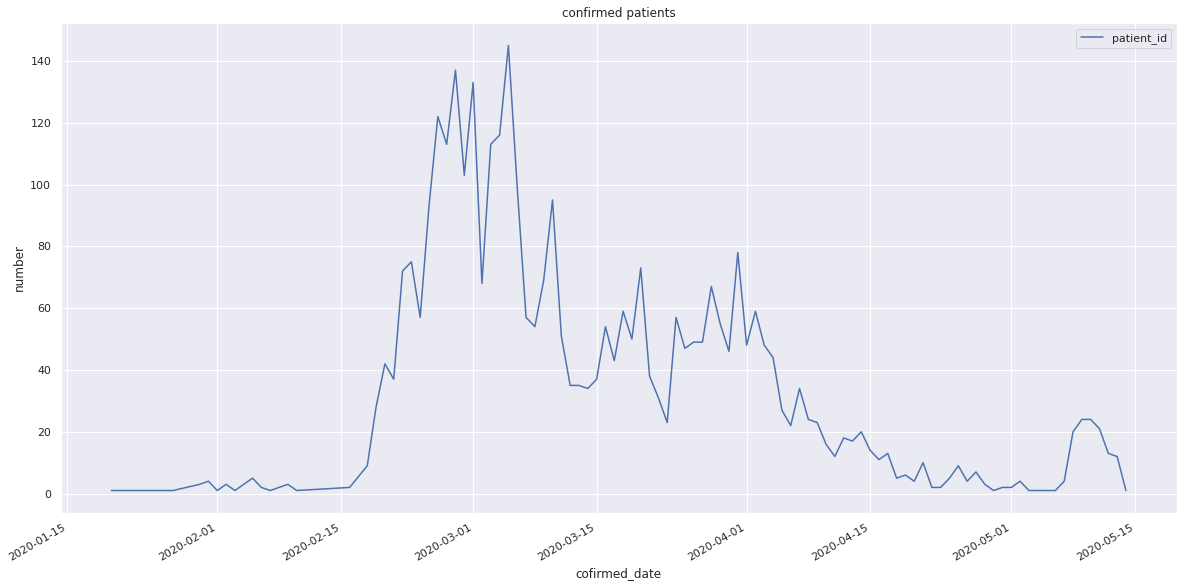

In [0]:
sns.set()
confirmed.plot(color='b', figsize=(20,10), label='patient')
plt.title('confirmed patients')
plt.xlabel('cofirmed_date')
plt.ylabel('number')

#**기말 프로젝트 제출 공모전**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving forecast.PNG to forecast.PNG


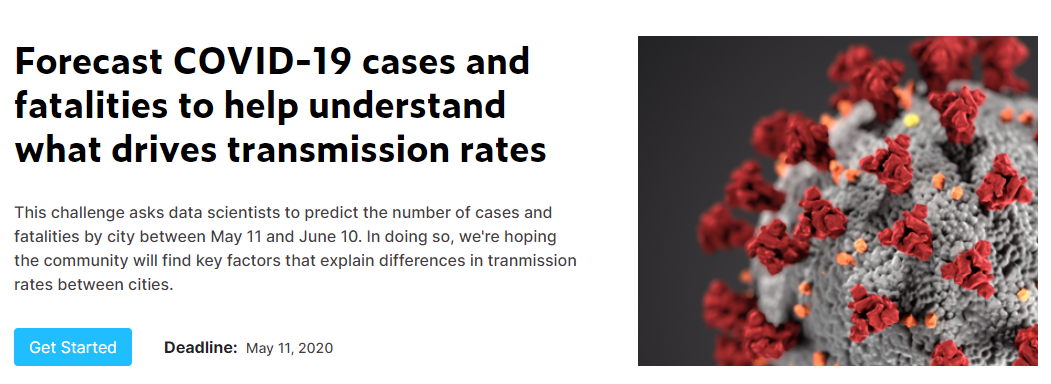

In [0]:
from IPython.display import Image
Image('forecast.PNG')

https://www.kaggle.com/c/covid19-global-forecasting-week-5/overview

#**학습 내용 업로드**
*github commit*

https://github.com/younghw4n/deeplearning.git